In [2]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, zscore
import numpy as np
from brokenaxes import brokenaxes

In [14]:
# Function to create the dataframes per framework
# Also removed outliers
def create_df (framework):
    dir = f"results/{framework}"
    csv_files = [f for f in os.listdir(dir) if f.endswith('.csv')]
    energy_values = []
    
    for file in csv_files:
        file_path = os.path.join(dir, file)
        df = pd.read_csv(file_path)
        
        if 'PACKAGE_ENERGY (J)' in df.columns:
            energy_diff = df['PACKAGE_ENERGY (J)'].iloc[-1] - df['PACKAGE_ENERGY (J)'].iloc[0]
            energy_values.append({"PACKAGE ENERGY (J)": energy_diff})
        else:
            print(f"Skipping {file}, 'PACKAGE_ENERGY (J)' column not found.")
            
    energy_df = pd.DataFrame(energy_values)
    energy_df["Framework"] = framework.capitalize()
    z_scores = zscore(energy_df['PACKAGE ENERGY (J)'])
    energy_df = energy_df[np.abs(z_scores) < 2]
    return energy_df

In [15]:
df_express = create_df("express")
df_flask = create_df("flask")
df_spring = create_df("springboot")
df = pd.concat([df_express, df_spring, df_flask])

In [16]:
_, p_express = shapiro(df_express['PACKAGE ENERGY (J)'])
_, p_flask = shapiro(df_flask['PACKAGE ENERGY (J)'])
_, p_spring = shapiro(df_spring['PACKAGE ENERGY (J)'])
print(f"P-Value Express: {p_express}\nP-Value Flask: {p_flask}\nP-Value Springboot: {p_spring}")

P-Value Express: 0.36511326801092014
P-Value Flask: 0.1815865174558831
P-Value Springboot: 0.5862615714192757


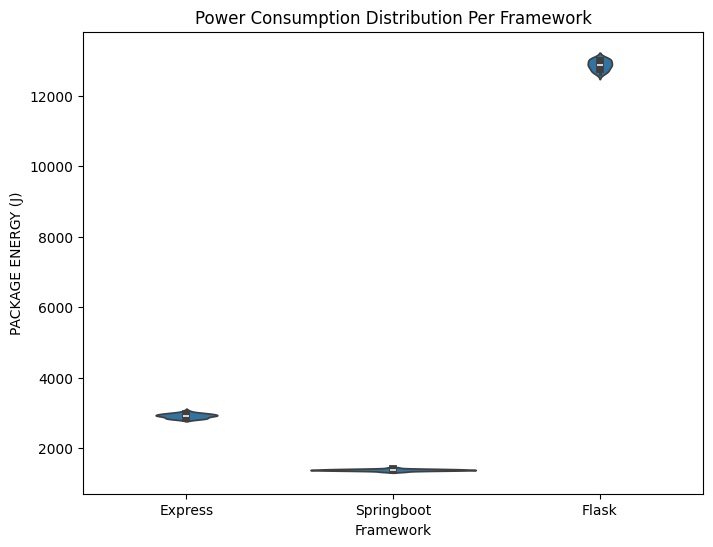

In [19]:
# Create the violin plot
plt.figure(figsize=(8, 6))
plt.title("Power Consumption Distribution Per Framework")
sns.violinplot(x='Framework', y='PACKAGE ENERGY (J)', data=df)

# Show the plot
plt.show()